<a href="https://colab.research.google.com/github/GokulKumar-7/Stock-analysis/blob/main/Data_Week_3_GK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_test = pd.DataFrame(data=[['1',2,3.0],[4,'5',6],[0.07,88.0,999]],columns=['A','B','C'])
df_test.tail(3)



,A,B,C
0,1,2,3.0
1,4,5,6.0
2,0.07,88.0,999.0


In [ ]:
import pandas as pd
df_listings = pd.read_csv('../content/data/listings_sample.csv',
    usecols=['host_id','id','name','room_type','price'])
df_listings.head()

,host_id,id,name,room_type,price
0,43039,11551,Arty and Bright London Apartment in Zone 2,Entire home/apt,$110.00
1,54730,13913,Holiday London DB Room Let-on going,Private room,$40.00
2,60302,15400,Bright Chelsea Apartment. Chelsea!,Entire home/apt,$75.00
3,67564,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,Entire home/apt,$307.00
4,103583,25123,Clean big Room in London (Room 1),Private room,$29.00


In [ ]:
import pandas as pd
df_hosts = pd.read_csv('../content/data/hosts_sample.csv',
    usecols=['id','host_name','host_since'])
df_hosts.head()




,id,host_name,host_since
0,43039.0,Adriano,2009-10-03
1,54730.0,Alina,2009-11-16
2,60302.0,Philippa,2009-12-05
3,67564.0,Liz,2010-01-04
4,103583.0,Grace,2010-04-05


In [ ]:
import pandas as pd
df_hosts = pd.read_csv('../content/data/hosts_sample.csv',
    usecols=['id','host_name','host_since'])
df_hosts.head()
df_hosts[df_hosts['host_since'].isna()].head() ###


,id,host_name,host_since
59,503548.0,NaN,NaN
93,761400.0,NaN,NaN
160,1436390.0,NaN,NaN
162,1438437.0,NaN,NaN
167,1467581.0,NaN,NaN


In [ ]:
df_hosts = df_hosts[~df_hosts['host_since'].isna()]

def host_years_old(host_since):
    return(2021 - int(host_since.split('-')[0]))

df_hosts['host_years_old'] = df_hosts['host_since'].apply(host_years_old)
df_hosts.head()



,id,host_name,host_since,host_years_old
0,43039.0,Adriano,2009-10-03,12
1,54730.0,Alina,2009-11-16,12
2,60302.0,Philippa,2009-12-05,12
3,67564.0,Liz,2010-01-04,11
4,103583.0,Grace,2010-04-05,11


In [ ]:
import pandas as pd
df_listings = pd.read_csv('../content/data/listings_sample.csv',
    usecols=['host_id','id','name','room_type','price'])
def format_price(price):
    return(float(price.replace('$','').replace(',','')))

df_listings['price'] = df_listings['price'].apply(format_price)

df_listings.head()


,host_id,id,name,room_type,price
0,43039,11551,Arty and Bright London Apartment in Zone 2,Entire home/apt,110.0
1,54730,13913,Holiday London DB Room Let-on going,Private room,40.0
2,60302,15400,Bright Chelsea Apartment. Chelsea!,Entire home/apt,75.0
3,67564,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,Entire home/apt,307.0
4,103583,25123,Clean big Room in London (Room 1),Private room,29.0


In [ ]:
df_hosts = df_hosts[~df_hosts['host_since'].isna()]

def host_years_old(host_since):

    return(2021 - int(host_since.split('-')[0]))
    df_hosts_ancient = df_hosts[df_hosts['host_years_old']>11]

df_hosts['host_years_old'] = df_hosts['host_since'].apply(host_years_old)
df_hosts.head()



,id,host_name,host_since,host_years_old
0,43039.0,Adriano,2009-10-03,12
1,54730.0,Alina,2009-11-16,12
2,60302.0,Philippa,2009-12-05,12
3,67564.0,Liz,2010-01-04,11
4,103583.0,Grace,2010-04-05,11


------------------------------------------ 02 **Advanced :Data analysis**



In [ ]:
import pandas as pd
df_reviews = pd.read_csv('../content/data/reviews_sample.csv')
df_reviews.head()
df_reviews_missing = df_reviews[df_reviews['comments'].isna()]

print(df_reviews_missing.head(4))


      listing_id         id        date  reviewer_id reviewer_name comments
4364    24425123  619002895  16/03/2020    272113241   Christopher      NaN
6290    14720793  193680502  14/09/2017     36572256          Ryan      NaN
7833    37280381  609618747  23/02/2020    107140807        Taylor      NaN


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def calculate_sentiment(comment):
    return(scorer.polarity_scores(comment)['compound'])

N = 5
df_reviews_sample = df_reviews.sample(N)
df_reviews_sample.loc[:,'sentiment'] = df_reviews_sample['comments'].apply(calculate_sentiment)
df_reviews_sample[['comments','sentiment']].head()

,comments,sentiment
7437,Trung est un hôte très sympathique : accueil c...,0.0000
7144,"Rooms ace, location is ace and Jamie was sound...",0.4019
2408,Great apartment for 5 people -- we all had our...,0.8651
519,I had a great time at Lidia's. Camden is a gre...,0.9690
4526,"Exactly as described. Very clean, well equipp...",0.9798


In [ ]:
import pandas as pd
df_listings = pd.read_csv('../content/data/listings_sample.csv')
df_listings.head()
df_listings['room_type'].value_counts().head()

,count
room_type,
Entire home/apt,5394
Private room,4516
Shared room,65
Hotel room,25


In [ ]:
import pandas as pd
df_listings = pd.read_csv('../content/data/listings_sample.csv')

def format_price(price):
    return(float(price.replace('$','').replace(',','')))

df_listings['price'] = df_listings['price'].apply(format_price)

df_listings.head()


,host_id,id,name,description,neighborhood_overview,neighbourhood,latitude,longitude,room_type,accommodates,...,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,43039,11551,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments my flat gives yo...,Not even 10 minutes by metro from Victoria Sta...,"London, United Kingdom",51.46095,-0.11758,Entire home/apt,4,...,"[""Hair dryer"", ""Essentials"", ""Washer"", ""Lockbo...",110.0,193,91.0,9.0,9.0,10.0,10.0,9.0,9.0
1,54730,13913,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,"Islington, Greater London, United Kingdom",51.56861,-0.11270,Private room,2,...,"[""Kitchen"", ""Host greets you"", ""Bed linens"", ""...",40.0,21,97.0,10.0,10.0,10.0,10.0,9.0,9.0
2,60302,15400,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,"London, United Kingdom",51.48780,-0.16813,Entire home/apt,2,...,"[""Kitchen"", ""Hangers"", ""Fire extinguisher"", ""L...",75.0,89,96.0,10.0,10.0,10.0,10.0,10.0,9.0
3,67564,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...","London, Fitzrovia, United Kingdom",51.52195,-0.14094,Entire home/apt,6,...,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...",307.0,42,94.0,10.0,9.0,9.0,9.0,10.0,9.0
4,103583,25123,Clean big Room in London (Room 1),Big room with double bed/ clean sheets/ clean ...,Barnet is one of the largest boroughs in Londo...,"Barnet, England, United Kingdom",51.57438,-0.21081,Private room,2,...,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...",29.0,129,96.0,10.0,10.0,10.0,10.0,9.0,10.0


In [ ]:
df_entire_home_apt = df_listings[df_listings['room_type']=='Entire home/apt']
df_entire_home_apt = df_entire_home_apt.sort_values(by=['price'],ascending=False)
df_entire_home_apt[['id','name','description','neighbourhood','price','room_type']].head(10)

,id,name,description,neighbourhood,price,room_type
6334,10355508,West End Apartment 1 on Wardour St,This brand new luxury one-bed apartment is on ...,"London, United Kingdom",17803.0,Entire home/apt
5293,8335468,Mulberry Flat 5 - One bedroom 3rd floor,One bedroom apartment on the third floor (with...,NaN,16023.0,Entire home/apt
9822,16117778,Heinze Flat 401 - One bedroom fourth floor flat,This one bedroom apartment is located on the f...,NaN,16023.0,Entire home/apt
9823,16117963,Heinze Flat 402 - One bedroom fourth floor flat,This one bedroom apartment is located on the f...,NaN,16023.0,Entire home/apt
5292,8335339,Mulberry Flat 6 - Two bedroom 3rd floor,Two bedroom apartment on the third floor (with...,NaN,16023.0,Entire home/apt
6084,9769911,Mulberry Flat 4 - Two bedroom 2nd floor,Two bedroom apartment on the second floor (wit...,NaN,16023.0,Entire home/apt
6081,9768672,Mulberry Flat 1 - One bedroom 1st floor,One bedroom apartment on the first floor (with...,NaN,15940.0,Entire home/apt
6986,11851238,Wonderful Apartment Near ExCeL & Central London,"Wonderful 4-bedroom, 2-bathroom apartment near...","London, United Kingdom",7186.0,Entire home/apt
5102,7974622,Amazing Victoria era flat,"Cosy, refurbished Victoria era flat for those ...",NaN,5000.0,Entire home/apt
3424,5178272,House by Buckingham Palace Belgravia with garden,Romantic cottage - secluded haven in exclusive...,"London, Belgravia, United Kingdom",2000.0,Entire home/apt


In [ ]:
df_entire_home_apt = df_listings[df_listings['room_type']=='Private room']
df_entire_home_apt = df_entire_home_apt.sort_values(by=['price'],ascending=True)
df_entire_home_apt[['id','name','description','neighbourhood','price','room_type']].head(10)

,id,name,description,neighbourhood,price,room_type
7139,12142193,"Room in Clean, Cosy Chiswick flat","Chiswick is a safe, pretty and well connected ...",United Kingdom,8.0,Private room
6787,11381983,Cheap & cheerful double room in Zone 2,Double bedroom available in 2 bed trad Edwardi...,"London, England, United Kingdom",10.0,Private room
312,388700,"MORDEN London Zone 4, Bright Single Room",A bright room in a 1940's apartment block in M...,"Morden, Surrey, United Kingdom",12.0,Private room
6493,10778211,Lovely furnished double room,A beautiful warm family home in a very quiet a...,"London, United Kingdom",12.0,Private room
4680,7327440,Double bedroom fantastic links London 12 minutes,Small double bedroom in shared house. Perfect ...,NaN,14.0,Private room
583,547462,Private Room Close To Brick Lane,<b>The space</b><br />Central London Zone 1 ac...,NaN,14.0,Private room
4594,7208317,Double room with fantastic links to London 12 min,"Double room in shared house, sleeps 2<br />20 ...",NaN,14.0,Private room
6225,10051499,Female Flat - Corner Small Single In Shared Flat,Friendly stay with international ladies (20s -...,NaN,15.0,Private room
7116,12102930,Room in a Victorian family home,We are just a 10 minute walk to the station 2...,"London, catford, United Kingdom",15.0,Private room
1873,2355323,Spacious Room Offered (NO SOLO TRAVELLERS),spacious room offered in Oval with three singl...,"Greater London, United Kingdom",15.0,Private room


In [ ]:
import pandas as pd
df_reviews = pd.read_csv('../content/data/reviews_sample.csv')

df_reviews = df_reviews[~df_reviews['comments'].isna()]

df_reviews = df_reviews[df_reviews['date']>'05/10/2020']

listing_counts = df_reviews['listing_id'].value_counts()

valid_listings = listing_counts[listing_counts>=5].index

df_reviews = df_reviews[df_reviews['listing_id'].isin(valid_listings)]

print(df_reviews.head(5))


     listing_id         id        date  reviewer_id reviewer_name  \
13     14273054  102253576  17/09/2016     88238296          Soon   
26     15061844  351537585  23/11/2018     38007788        Amanda   
156       36660   42874868  16/08/2015     37125157       Eng Wee   
170     7278104   63422561  22/02/2016     58311246           Lya   
192      698606  512144656  18/08/2019      6173151     Constance   

                                              comments  
13                      Friendly host, good location!   
26                          good value will stay again  
156  Both Agri & Roger were such fantastic hosts. U...  
170  Ivana is very nice and friendly, the flat is i...  
192  We spent 3 very good days in London , and it w...  


In [ ]:
print(sum(df_reviews['comments'].isna()))
print(sum(df_reviews['date']<='2018-10-05'))
print(sum(df_reviews['listing_id'].value_counts()<5))

0
0
0


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df_reviews = pd.read_csv('../content/data/reviews_sample.csv')

df_reviews = df_reviews[~df_reviews['comments'].isna()]

df_reviews = df_reviews[df_reviews['date']>'05/10/2020']

listing_counts = df_reviews['listing_id'].value_counts()

valid_listings = listing_counts[listing_counts>=5].index

df_reviews = df_reviews[df_reviews['listing_id'].isin(valid_listings)]

scorer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
df_reviews['sentiment'] = df_reviews['comments'].apply(lambda x: scorer.polarity_scores(x)['compound'])

# Print the DataFrame with the added sentiment column
print(df_reviews.head(5))

     listing_id         id        date  reviewer_id reviewer_name  \
13     14273054  102253576  17/09/2016     88238296          Soon   
26     15061844  351537585  23/11/2018     38007788        Amanda   
156       36660   42874868  16/08/2015     37125157       Eng Wee   
170     7278104   63422561  22/02/2016     58311246           Lya   
192      698606  512144656  18/08/2019      6173151     Constance   

                                              comments  sentiment  
13                      Friendly host, good location!      0.7500  
26                          good value will stay again     0.6486  
156  Both Agri & Roger were such fantastic hosts. U...     0.9775  
170  Ivana is very nice and friendly, the flat is i...     0.9816  
192  We spent 3 very good days in London , and it w...     0.9768  


In [ ]:
listings_scored = df_reviews.groupby('listing_id')['sentiment'].agg(['mean']).reset_index()
listings_scored.head()

,listing_id,mean
0,36660,0.383243
1,42010,0.941213
2,304918,0.645200
3,361662,0.933083
4,375006,0.818000


In [ ]:
listings_scored = listings_scored.sort_values(by=['mean'],ascending=False)
listings_scored.head(8)

,listing_id,mean
13,1065051,0.966060
1,42010,0.941213
3,361662,0.933083
17,3602711,0.930460
22,5010158,0.918260
6,554694,0.913500
32,12330363,0.909220
7,599058,0.905867


 **Data** **Visualisation** >>>>>>>>>>>>>











In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

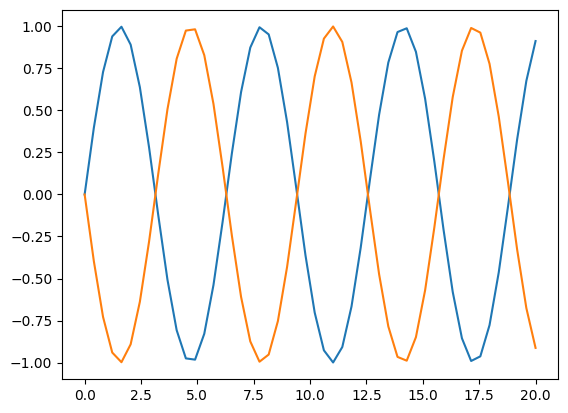

In [ ]:
x = np.linspace(0, 20)
y1 = np.sin(x)
y2 = np.sin(x - np.pi)

plt.figure()

plt.plot(x, y1)
plt.plot(x, y2)


''

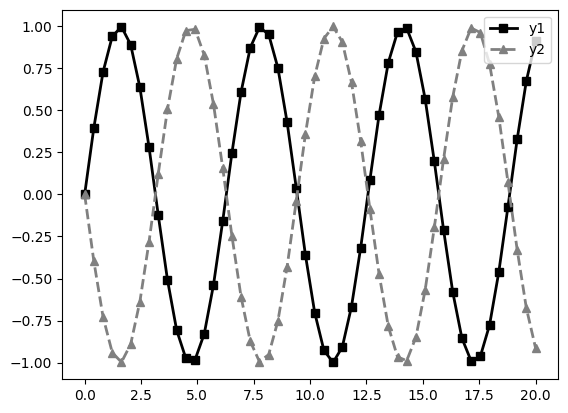

In [ ]:
x = np.linspace(0, 20)
y1 = np.sin(x)
y2 = np.sin(x - np.pi)

plt.figure()

plt.plot(x,y1,color='black',
         linestyle='-',
         linewidth=2,
         marker='s',
         markersize=6,
         label='y1')

plt.plot(x,
         y2,
         color='gray',
         linestyle='--',
         linewidth=2,
         marker='^',
         markersize=6,
         label='y2')

plt.legend()
;

''

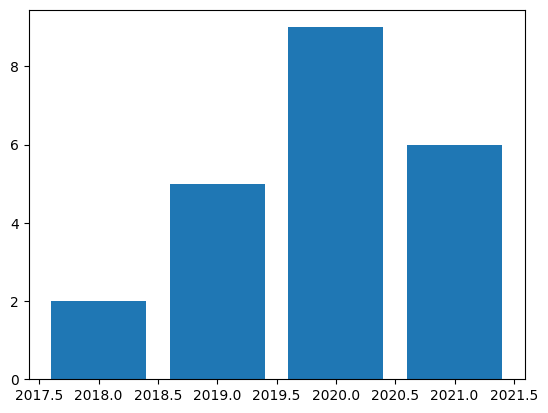

In [ ]:
years = np.arange(2018, 2022)
values = [2, 5, 9, 6]

plt.figure()

plt.bar(years, values)
;

''

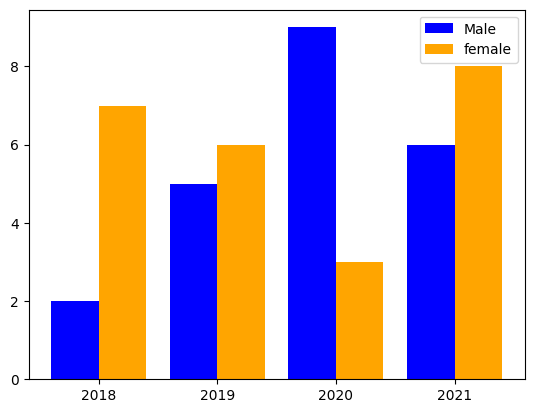

In [ ]:
years = np.arange(2018, 2022)
category1_values = [2, 5, 9, 6]
category2_values = [7, 6, 3, 8]

plt.figure()

plt.bar(years - 0.2,
        category1_values,
        color='blue',
        edgecolor='none',
        width=0.4,
        align='center',
        label='Male')

plt.bar(years + 0.2,
        category2_values,
        color='orange',
        edgecolor='none',
        width=0.4,
        align='center',
        label='female')

plt.xticks(years, [str(year) for year in years])

plt.legend()
;

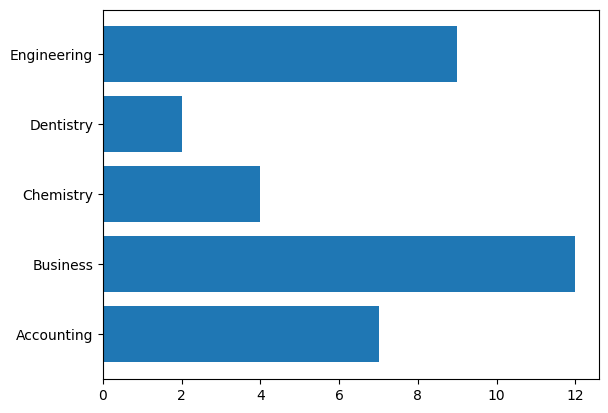

In [ ]:
categories = ['Accounting', 'Business', 'Chemistry', 'Dentistry', 'Engineering']
values = [7, 12, 4, 2, 9]

plt.figure()

plt.barh(np.arange(len(categories)), values)

plt.yticks(np.arange(len(categories)),
           ['{}'.format(x) for x in categories]);



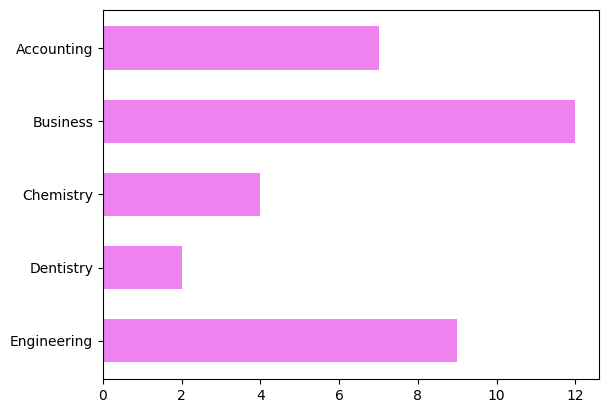

In [ ]:
categories = ['Accounting', 'Business', 'Chemistry', 'Dentistry', 'Engineering']
values = [7, 12, 4, 2, 9]

plt.figure()

plt.barh(-np.arange(len(categories)),
         values,
         color='violet',
         edgecolor='none',
         height=0.6,
         align='center')

plt.yticks(-np.arange(len(categories)),
           ['{}'.format(x) for x in categories]);

''

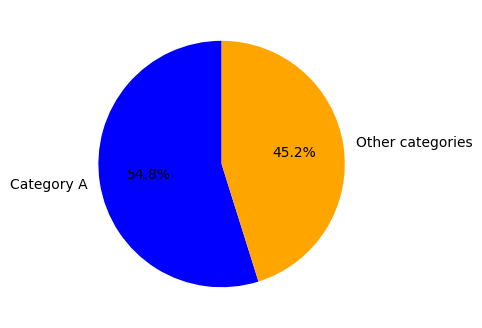

In [ ]:
counts = [17, 14]

plt.figure(figsize=(4, 4))

plt.pie(counts,
        colors=['blue', 'orange'],
        labels=['Category A', 'Other categories'],
        startangle=90,
        autopct='%1.1f%%')
;

''

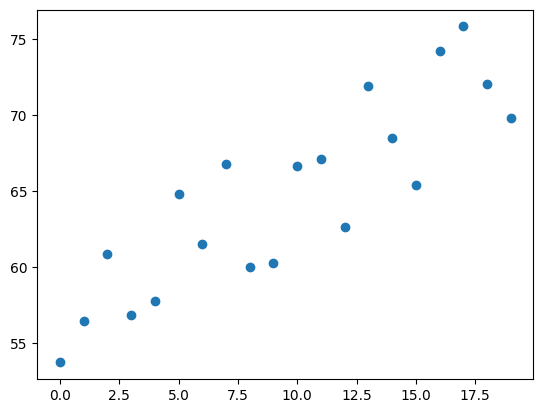

In [ ]:
x = range(20)
y = np.arange(50, 70) + (np.random.random(20) * 10.)

plt.figure()

plt.scatter(x, y)
;

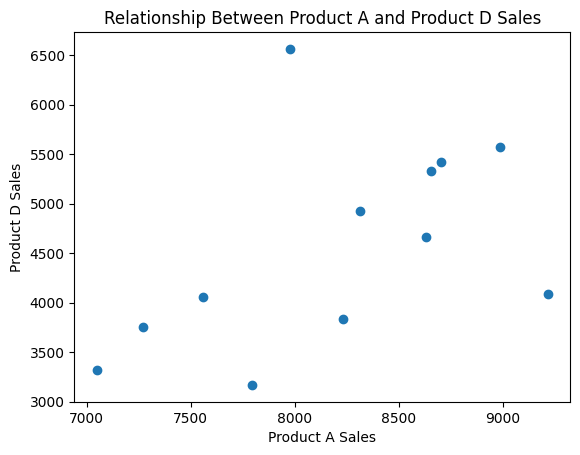

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/data/monthly_sales.xlsx')

x = df['Product A']
y = df['Product D']

plt.scatter(x, y)

plt.xlabel('Product A Sales')
plt.ylabel('Product D Sales')

plt.title('Relationship Between Product A and Product D Sales')

plt.show()

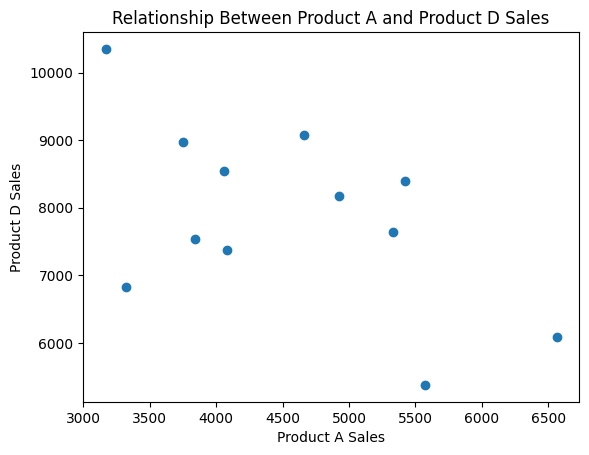

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/data/monthly_sales.xlsx')

x = df['Product D']
y = df['Product E']

plt.scatter(x, y)

plt.xlabel('Product A Sales')
plt.ylabel('Product D Sales')
plt.title('Relationship Between Product A and Product D Sales')

plt.show()

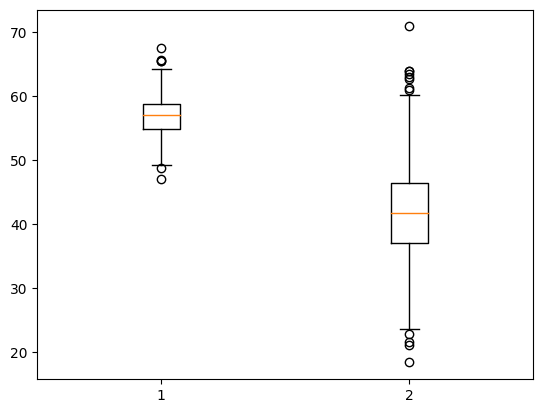

In [ ]:
two_columns_data = [np.random.normal(57, 3, 1000),
                    np.random.normal(42, 7, 1000)]

plt.boxplot(two_columns_data);

''

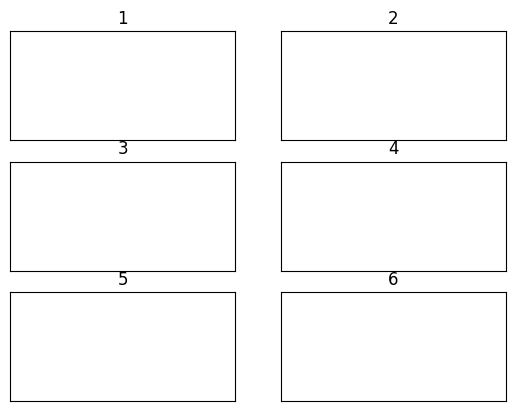

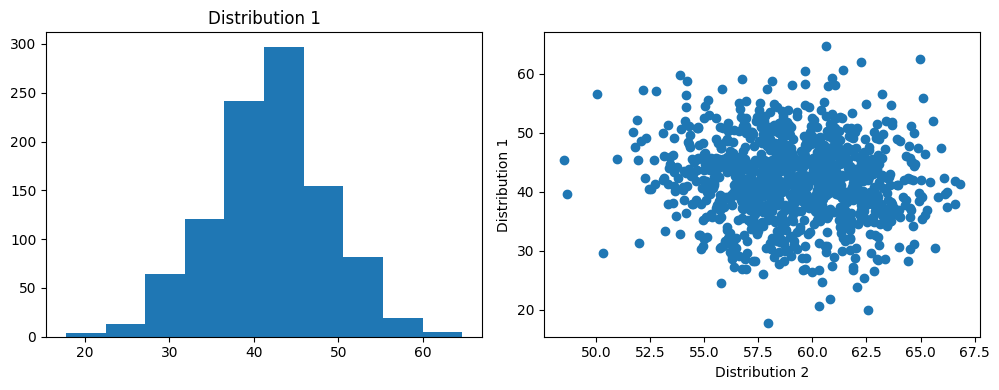

In [ ]:
plt.figure()

for i in range(1, 7):
    plt.subplot(3, 2, i)
    plt.title(i)
    plt.xticks([])
    plt.yticks([])

dist1 = np.random.normal(42, 7, 1000)
dist2 = np.random.normal(59, 3, 1000)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(dist1)
plt.title('Distribution 1')

plt.subplot(1, 2, 2)
plt.scatter(dist2, dist1)
plt.xlabel('Distribution 2')
plt.ylabel('Distribution 1')

plt.tight_layout()
;